In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy as tp
import json 

In [2]:
#Read CSV file 
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df1.sort_values('timestamp')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [5]:
df2 = pd.read_csv('image_predictions.tsv', sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
consumer_key = '5Uur0mo4ol2kB8yhtZ1VxXS0u'
consumer_secret = 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH'
access_token = '303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB'
access_secret = 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft'

auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tp.API(auth, wait_on_rate_limit = True)

In [7]:
df_list = []
errors = []

for id in df1['tweet_id']:
    try:
        tweet = api.get_status(id, tweet_mode='extended')
        df_list.append({'tweet_id': str(tweet.id),
                        'favorite_count': int(tweet.favorite_count),
                        'retweet_count': int(tweet.retweet_count)})
    except Exception as e:
        print(str(id) + " : " + str(e))
        errors.append(id)

888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 : [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 : [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 : [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 : [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 : [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 : [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 : [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 : [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 : [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 : [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 : [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 : [{'code

In [8]:
print("The list of tweets" ,len(df_list))
print("The list of tweets no found" , len(errors))

The list of tweets 2330
The list of tweets no found 26


In [10]:
my_list_of_dicts = []
for each_json_tweet in df_list:
    my_list_of_dicts.append(each_json_tweet)

In [11]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [12]:
with open('tweet_json.txt', 'r') as file:
    df3 = pd.DataFrame(json.load(file), columns=['tweet_id', 'favorite_count', 'retweet_count'])

In [13]:
df3.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34994,7343
1,892177421306343426,30299,5479
2,891815181378084864,22789,3623
3,891689557279858688,38253,7532
4,891327558926688256,36535,8112


In [15]:
#Data Assesing
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2330 non-null   object
 1   favorite_count  2330 non-null   int64 
 2   retweet_count   2330 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [22]:
df3.describe()

,favorite_count,retweet_count
count,2330.000000,2330.000000
mean,7309.371245,2586.584120
std,11350.453869,4374.382758
min,0.000000,1.000000
25%,1267.000000,525.250000
50%,3168.000000,1206.000000
75%,8937.000000,2993.500000
max,150390.000000,74205.000000


In [25]:
# checks for duplicated entries
df1[df1.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
# checking rating denominators
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
# checking rating numerators
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [28]:
#Cleaning Data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

In [30]:
# Delete retweets by filtering the NaN of retweeted_status_user_id
df1_clean = df1_clean[pd.isnull(df1_clean['retweeted_status_user_id'])]
#test
print(sum(df1_clean.retweeted_status_user_id.value_counts()))

0


In [31]:
# Delete columns that are not needed
df1_clean = df1_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

In [32]:
#TEST
list(df1_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [33]:
# Merge the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
df1_clean = pd.melt(df1_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

In [34]:
df1_clean = df1_clean.drop('dogs', 1)

In [35]:
#Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
df1_clean = df1_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [36]:
#TEST
df1_clean['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

In [37]:
# Convert timestamp to datetime
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

In [38]:
#extract year, month and day to new columns then drop the timestamp coloumn
df1_clean['year'] = df1_clean['timestamp'].dt.year
df1_clean['month'] = df1_clean['timestamp'].dt.month
df1_clean['day'] = df1_clean['timestamp'].dt.day

df1_clean = df1_clean.drop('timestamp', 1)

In [39]:
#TEST
list(df1_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

In [40]:
# Changing numerator and denominators type int to float to allow decimals 
df1_clean[['rating_numerator', 'rating_denominator']] = df1_clean[['rating_numerator','rating_denominator']].astype(float)

In [41]:
#Update numerators for the float values
df1_clean.loc[(df1_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df1_clean.loc[(df1_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df1_clean.loc[(df1_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df1_clean.loc[(df1_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df1_clean.loc[(df1_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#Test
with pd.option_context('max_colwidth', 200):
    display(df1_clean[df1_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Youssef\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


In [43]:
#Update both numerators and denominators
df1_clean.loc[(df1_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
df1_clean.loc[(df1_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

df1_clean.loc[(df1_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
df1_clean.loc[(df1_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

df1_clean.loc[(df1_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
df1_clean.loc[(df1_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

df1_clean.loc[(df1_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
df1_clean.loc[(df1_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

df1_clean.loc[(df1_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
df1_clean.loc[(df1_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#Delete five tweets with no actual ratings
df1_clean = df1_clean[df1_clean['tweet_id'] != 832088576586297345]
df1_clean = df1_clean[df1_clean['tweet_id'] != 810984652412424192]
df1_clean = df1_clean[df1_clean['tweet_id'] != 682808988178739200]
df1_clean = df1_clean[df1_clean['tweet_id'] != 835246439529840640]
df1_clean = df1_clean[df1_clean['tweet_id'] != 686035780142297088]

#Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(df1_clean[df1_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0


In [44]:
# Create a new column with rating in float type to avoid converting all int column to float
df1_clean['rating'] = 10 * df1_clean['rating_numerator'] / df1_clean['rating_denominator'].astype(float)

#TEST
df1_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
2312,861383897657036800,This is Hobbes. He's never seen bubbles before...,13.0,10.0,Hobbes,None,2017,5,8,13.0
5638,694329668942569472,Meet Grady. He's very hungry. Too bad no one c...,9.0,10.0,Grady,pupper,2016,2,2,9.0
3572,687460506001633280,This is Kramer. He's a Picasso Tortellini. Tie...,10.0,10.0,Kramer,None,2016,1,14,10.0
2459,832397543355072512,This is Eevee. She wants to see how you're doi...,12.0,10.0,Eevee,None,2017,2,17,12.0
213,845397057150107648,Say hello to Mimosa. She's an emotional suppor...,13.0,10.0,Mimosa,doggo,2017,3,24,13.0


In [45]:
#Delete duplicated jpg_url
df2_clean = df2_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(df2_clean['jpg_url'].duplicated())

0

In [46]:
# Predictions will be store in these lists
dog_type = []
confidence_list = []

def image(df2_clean):
    if df2_clean['p1_dog'] == True:
        dog_type.append(df2_clean['p1'])
        confidence_list.append(df2_clean['p1_conf'])
    elif df2_clean['p2_dog'] == True:
        dog_type.append(df2_clean['p2'])
        confidence_list.append(df2_clean['p2_conf'])
    elif df2_clean['p3_dog'] == True:
        dog_type.append(df2_clean['p3'])
        confidence_list.append(df2_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

In [47]:
df2_clean.apply(image, axis=1)

#create new columns that containes the new vlaues
df2_clean['dog_type'] = dog_type
df2_clean['confidence_list'] = confidence_list

In [48]:
#delete rows that has errors
df2_clean = df2_clean[df2_clean['dog_type'] != 'Error']

#TEST: 
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [49]:
#Delete columns
df2_clean = df2_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)


#TEST
list(df2_clean)

['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

In [56]:
#Refrence: https://stackoverflow.com/questions/15063936/csv-error-field-larger-than-field-limit-131072/15063941#15063941
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

In [59]:
# Changing tweet_id from str to int
df3_clean['tweet_id'] = df3_clean['tweet_id'].astype('int64')


In [60]:
#TEST
df3_clean['tweet_id'].dtypes

dtype('int64')

In [62]:
#Merging the three dataframes

df_master = pd.merge(df1_clean, 
                      df2_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_master = df_master[df_master['jpg_url'].notnull()]

#TEST
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [63]:
#create a new dataframe that merge df_master and df3_clean
df_master_clean = pd.merge(df_master, df3_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
 13  favorite_count      1618 non-null   float64
 14  retweet_count       1618 non-null   float64
dtypes: float64(5), int64(4), object(6)
memory usage: 203.1+

In [64]:
df_master_clean['rating_numerator'].value_counts()

12.00     404
10.00     354
11.00     342
13.00     212
9.00      133
8.00       68
7.00       31
14.00      22
6.00       16
5.00       13
4.00        6
3.00        5
2.00        2
13.50       2
44.00       1
143.00      1
99.00       1
45.00       1
60.00       1
144.00      1
88.00       1
84.00       1
9.75        1
0.00        1
11.26       1
165.00      1
11.27       1
121.00      1
80.00       1
Name: rating_numerator, dtype: int64

In [65]:
#Store the clean DataFrame in a CSV file
df_master_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [66]:
#Insights

df_master_clean['dog_type'].value_counts()

golden_retriever      142
Labrador_retriever    103
Pembroke               94
Chihuahua              87
pug                    60
                     ... 
silky_terrier           1
standard_schnauzer      1
Japanese_spaniel        1
Irish_wolfhound         1
Scotch_terrier          1
Name: dog_type, Length: 113, dtype: int64

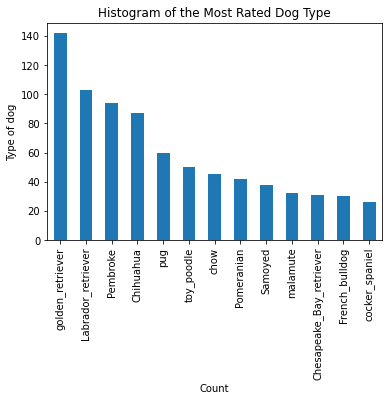

In [67]:
df_dog_type = df_master_clean.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [69]:
df_dog_type_mean = df_master_clean.groupby('dog_type').mean()

In [70]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating,favorite_count,retweet_count
dog_type,,,,,,,,,
Afghan_hound,8.095999e+17,8.000000,10.0,2016.500000,6.00,16.000000,8.000000,10755.500000,2995.500000
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.75,15.916667,9.833333,4657.250000,1171.583333
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.25,15.000000,10.312500,7457.933333,1730.333333
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.50,18.500000,11.000000,6482.500000,1202.500000
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.50,7.000000,11.500000,9873.000000,2608.500000


In [71]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
                                 ...    
Border_terrier                 12.142857
Irish_setter                   12.333333
briard                         12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating, Length: 113, dtype: float64

In [72]:
df_master_clean.sort_values('retweet_count', ascending=False)[['tweet_id','retweet_count']].head()

,tweet_id,retweet_count
1405,744234799360020481,74205.0
1398,739238157791694849,55304.0
1610,822872901745569793,41835.0
145,879415818425184262,39028.0
1570,866450705531457537,31584.0


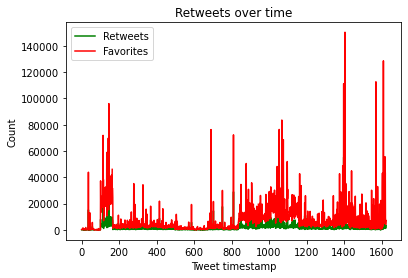

In [73]:
df_master_clean['retweet_count'].plot(color = 'green', label='Retweets')
df_master_clean['favorite_count'].plot(color = 'red', label='Favorites')

plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets over time')
plt.savefig('retweets_favorites.png')
plt.show()